Probability that product success rate > 70%: 35.63%


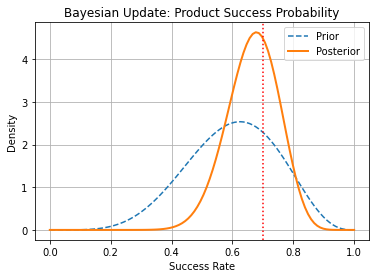

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Step 1: Define prior belief (Beta distribution)
# Prior: 60% success rate, moderate confidence
prior_alpha = 6
prior_beta = 4

# Step 2: Observed data from market test
positive_responses = 14
total_responses = 20

# Step 3: Bayesian updating
posterior_alpha = prior_alpha + positive_responses
posterior_beta = prior_beta + (total_responses - positive_responses)

# Step 4: Sample from posterior distribution
samples = 10000
posterior_samples = beta.rvs(posterior_alpha, posterior_beta, size=samples)

# Step 5: Estimate probability of success > threshold (e.g., 70%)
prob_success_above_70 = np.mean(posterior_samples > 0.7)
print(f"Probability that product success rate > 70%: {prob_success_above_70:.2%}")

# Step 6: Visualize prior vs posterior
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, prior_alpha, prior_beta), label='Prior', linestyle='--')
plt.plot(x, beta.pdf(x, posterior_alpha, posterior_beta), label='Posterior', linewidth=2)
plt.axvline(0.7, color='red', linestyle=':')
plt.title('Bayesian Update: Product Success Probability')
plt.xlabel('Success Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Another example

Most probable probability of heads (p): 0.70
Probability that p is between 0.45 and 0.55 (fair range): 0.14


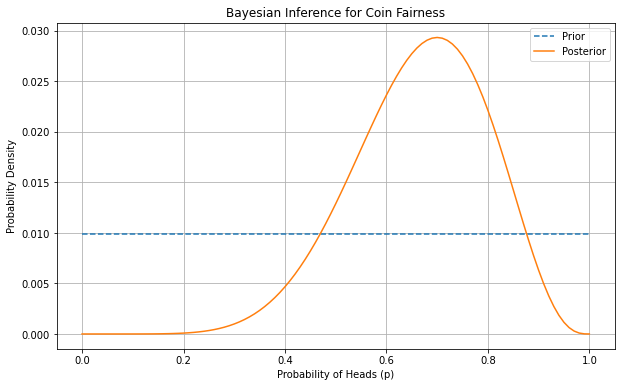

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define the possible values for the probability of heads (p)
# We assume p can range from 0 to 1 with a certain granularity
p_grid = np.linspace(0, 1, 101)

# Step 1: Define the Prior Distribution
# Initially, we assume all values of p are equally likely (uniform prior)
prior = np.ones_like(p_grid) / len(p_grid)

# Simulate some coin flip data (e.g., 7 heads out of 10 flips)
num_flips = 10
num_heads = 7

# Step 2: Calculate the Likelihood
# The likelihood of observing the data (num_heads in num_flips) for each p
likelihood = binom.pmf(k=num_heads, n=num_flips, p=p_grid)

# Step 3: Calculate the Posterior Distribution
# Posterior is proportional to Likelihood * Prior
posterior_unnormalized = likelihood * prior
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

# Decision Support: Make a decision based on the posterior
# For example, we might decide if the coin is "fair" (p near 0.5) or "biased"

# Find the most probable value of p
most_probable_p = p_grid[np.argmax(posterior)]
print(f"Most probable probability of heads (p): {most_probable_p:.2f}")

# Calculate the probability that p is within a certain range (e.g., fair coin)
prob_fair_range = np.sum(posterior[(p_grid >= 0.45) & (p_grid <= 0.55)])
print(f"Probability that p is between 0.45 and 0.55 (fair range): {prob_fair_range:.2f}")

# Visualize the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(p_grid, prior, label='Prior', linestyle='--')
plt.plot(p_grid, posterior, label='Posterior')
plt.title('Bayesian Inference for Coin Fairness')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Explanation:
Prior Distribution: Represents initial beliefs about the unknown parameter (the probability of heads, p). Here, a uniform prior is used, indicating no initial preference for any p value.

Likelihood: Describes the probability of observing the data given a specific value of p. The binomial probability mass function (binom.pmf) is used since coin flips are a binomial process.

Posterior Distribution: Calculated by multiplying the likelihood and the prior, and then normalizing. This distribution represents the updated beliefs about p after considering the observed data.

Decision Support: The posterior distribution can be used to make informed decisions. Examples include identifying the most probable value of p or calculating the probability that p falls within a specific range (e.g., indicating a "fair" coin). The visualization helps in understanding how beliefs have shifted from the prior to the posterior.